<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#XGBoost-CV-(LB-.284)" data-toc-modified-id="XGBoost-CV-(LB-.284)-1">XGBoost CV (LB .284)</a></span><ul class="toc-item"><li><span><a href="#Tree-based-model" data-toc-modified-id="Tree-based-model-1.1">Tree-based model</a></span></li><li><span><a href="#Advantages-and-Disadvantages-of-Trees" data-toc-modified-id="Advantages-and-Disadvantages-of-Trees-1.2">Advantages and Disadvantages of Trees</a></span></li><li><span><a href="#What-Is-Boosting-In-a-Word?" data-toc-modified-id="What-Is-Boosting-In-a-Word?-1.3">What Is Boosting In a Word?</a></span></li><li><span><a href="#What-is-XGBoost?" data-toc-modified-id="What-is-XGBoost?-1.4">What is XGBoost?</a></span></li><li><span><a href="#Rounds-and-Folds" data-toc-modified-id="Rounds-and-Folds-1.5">Rounds and Folds</a></span></li><li><span><a href="#Normalized-Gini-Coefficient-as-the-Evaluation-Metric" data-toc-modified-id="Normalized-Gini-Coefficient-as-the-Evaluation-Metric-1.6">Normalized Gini Coefficient as the Evaluation Metric</a></span></li></ul></li></ul></div>

# XGBoost CV (LB .284)

## Tree-based model
Decision tree: *stratifying* or *segmenting* the predictor space into a number of simple regions.
Because the set of splitting rules used to segment the predictor space can be summarized in a tree, these types of approaches are called ***decision tree*** methods.

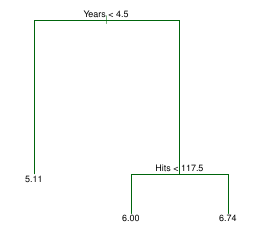
<center><figcaption>`Hitters` data predicts baseball players' salary based on their played years and hits the player made in the previous year.</figcaption></center>

\- From Introduction to Statistical Learning (ISLR), 2nd ed.

- Regression trees
- Classification trees

## Advantages and Disadvantages of Trees

Adv.
- Trees are very easy to explain.
- Intuitive decision-making process.
- Can be displayed graphically.
- Can handle qualitative predictors without the need to create dummy variables. (Yes/No, A/B/C/D/E, etc.)

Disadv.
- Trees are too simple to have the level of predictive accuracy like other regression and classification methods.
- Not robust. --> Small change in the data can cause a large change in the final estimated tree. == High variance.
    - 예를 들어 training data를 random segregation 하여 각각을 학습시키면 완전히 다른 모델이 나올 수 있다.

그래서...
Bagging, Random Forest, Boosting 등을 하게된다.

1. Bagging = bootstrap aggregation

    한마디로, averaging out trees with bootstrapped training data.

    Making many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions. This averaging out procedure will reduce the variance.

    --> Use bootstrap, i.e. take repeated samples from the single training data set. Then we can generate $B$ different bootstrapped training datasets. We then train our method on the $b$th bootstrapped training set in order to get $\hat f^{*b}(x)$, and finally average all the predictions to obtain

    $$
\hat f_{\textrm{bag}} = \frac{1}{B}\sum^B_{b=1}\hat f^{*b}(x)
$$


2. Random Forests

    Bagging에서와 같이 bootstrapped training data로부터 여러개의 tree를 만들어내기는 하는데, 매 split마다 전체 $p$개의 predictor 중에서 $m$개의 predictor를 random으로 사용하여 split한다. (대체로 $m \approx \sqrt{p}$) --> Tree간의 너무 강한 상관관계를 조금 loosen하기 위하여. == 너무 강한 predictor가 있으면 모든 bagged tree들에서 똑같이 그 강한 predictor가 맨 위에 위치하게 된다. 따라서 tree들은 서로 너무 강한 상관관계를 갖게 된다. 이는 model의 high variance로 이어진다. 따라서 robustness를 위해서 생성되는 tree들 사이의 관계를 *decorrelation* 시키는 것이다.


3. Boosting

    Bagging이 original training data를 bootstrapping을 통해 multiple copy of data를 만들고, 그 data에 대해 여러개의 tree를 combination하는 것이라면, boosting은 한 번 tree를 생성하고 그 tree의 정보를 이용해 다음 tree를 만든다.
    따라서 bootstrap sampling을 이용하지 않고, data set의 수정된 버전에 새로운 tree가 매 번 fitting된다. 그리고 한가지 더 유의해야 할 점은 outcome이 아닌 residual에 fitting (predicting) 된다는 것이다. Residual이란 target vector $y$와 current approximation인 $\hat y$간의 차이인 $y-\hat y$ 이다.
    그래서 매 iteration마다 predicted residual이 더해지게 된다.
    이 때, 방향을 가지고 있기 때문에 residual이 vector임에 유의하자. Residual은 $L_2$ loss function (MSE) = $\sum^N_i(y_i-\hat y_i)^2$의 gradient이고, residual의 부호인 $sign(y-\hat y)$는 $L_1$ loss function인 $\sum^N_i|y_i-\hat y_i|$의 gradient이다. 따라서 이 gradient를 통해 방향성을 가지고 loss function을 줄여나갈 수 있기 때문에 gradient boosting이라 부른다.

Explanation excerpted from [https://explained.ai/gradient-boosting/faq.html](https://explained.ai/gradient-boosting/faq.html).

Explained.ai has some great explanations on machine learning.

[Explanation on L1 loss and L2 loss functions.](https://wooono.tistory.com/221)
- L1 loss function: 차이의 절대값
- L2 loss function: 유클리드 거리

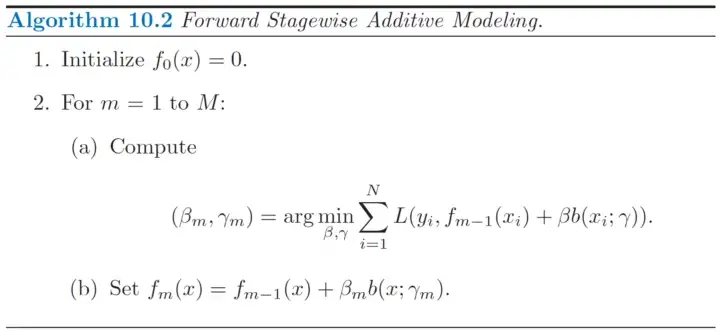

    from ESLII.


## What Is Boosting In a Word?
A gentle introduction to gradient boosting algorithm.
[https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)

약한 learning model (이 경우에 tree) 들이 모여서 더 좋은 learner가 될 수 있는가?

A weak hypothesis, or a weak learner == a model whose performance is at least slightly better than random chance.

--> Probably Approximately Correct (PAC) learning framework, proposed by Leslie Valiant in 1984.

> *The idea is to use the weak learning method several times to get a succession of hypotheses, each one refocued on the examples that the previous ones found difficult and misclassified. \[...\] Note, however, it is not obvious at all how this can be done.*


## What is XGBoost?

Excerpt from Nvidia's Data Science Glosaary page:

[https://www.nvidia.com/en-us/glossary/data-science/xgboost/](https://www.nvidia.com/en-us/glossary/data-science/xgboost/)

**XGBoost = Extreme Gradient Boosting**

It is an optimized open-source library that implements distributed gradient boosting algorithm. It provides *parallel* tree boosting and is the leading machine learning library for regression, classification, and ranking problems. It's, in short, an implementation of gradient boosted decision trees optimized for speed, scalability, and performance.

- Parallelization of tree construction using all of the CPU cores available during training.

- Distributed computing for training very large models using a cluster of machines.

- Out-of-Core computing for very large datasets that don't fit into memory.

- Cache optimization of data structures and algorithm to make best use of hardware.

Why use XGBoost?
1. Execution speed
2. Model Performance

Excerpts from [https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/).

Based on [olivier's script](https://www.kaggle.com/ogrellier/xgb-classifier-upsampling-lb-0-283)

## Rounds and Folds

<div>
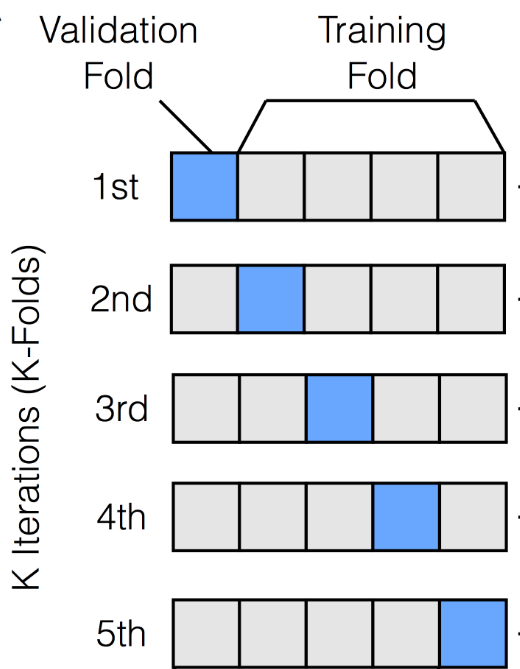
</div>

- rounds = number of iterations
- folds = cross validation folds

```
MAX_ROUNDS = 400
OPTIMIZE_ROUNDS = False
LEARNING_RATE = 0.07
EARLY_STOPPING_ROUNDS = 50
```

The author of this code recommends initially setting `MAX_ROUNDS` fairly high using `OPTIMIZE_ROUNDS` to get an idea of the appropriate number of rounds (여기서의 rounds는 iteration을 의미) (which, in his judgment, should be close to the maximum value of the `best_ntree_limit` among all folds maybe even a bit hihger if your model is adequately [**regularized**](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a)... or alternatively, you could set `verbose=True` and look at the details to try to find a number of rounds that works well for all folds.) Then I would turn off `OPTIMIZE_ROUNDS` and set `MAX_ROUNDS` to the appropriate number of total rounds.

The problem with "early stopping" by choosing the best round for each fold is that it overfits to the validation data. It's thererfore liable not to produce the optimal model for predicting test data, and if it's used to produce validation data for stacking/ensembling with other models, it would cause this one to have too much weight in the ensemble. Another possibility (and the default for XGBoost, it seems) is to use the round where the early stop actually happens (with the lag that verifies lack of improvement) rather than the best round. That solves the overfitting problem (provided that the lag is long enough), but so far it doesn't seem to have helped. (I got a worse validation score with 20-round early stopping per fold than with a constant number of rounds for all folds, so the early stopping actually seemed to underfit.)

https://rdrr.io/cran/xgboost/man/xgb.cv.html 이것 참고해볼 만 하다.

## Normalized Gini Coefficient as the Evaluation Metric

>Scoring Metric
>
>Submissions are evaluated using the **Normalized Gini Coefficient**.
>
>**During scoring, observations are sorted from the largest to the smallest predictions. Predictions are only used for ordering observations; therefore, the relative magnitude of the predictions are not used during scoring. The scoring algorithm then compares the cumulative proportion of positive class observations to a theoretical uniform proportion.**
>
>The Gini Coefficient ranges from approximately 0 for random guessing, to approximately 0.5 for a perfect score. The theoretical maximum for the discrete calculation is (1 - frac_pos) / 2.
>
>The Normalized Gini Coefficient adjusts the score by the theoretical maximum so that the maximum score is 1.
>
>The code to calculate Normalized Gini Coefficient in a number of different languages can be found in this forum thread.

- Imbalanced data 였음을 기억.
- 따라서 그냥 accuracy를 scoring metric으로 사용할 경우, 부정확한 모델에도 높은 정확도가 나올 수 있다.
    - e.g.) 95% sunny vs. 5% rainy days --> A simple model that predicts 100% sunny.
    - 95% accuracy
- AUROC (Area Under the Reciver Operating Characteristic curve)
- Gini coefficient는 AUROC와 equivalent하다. (약간의 tweak --> Gini)

<div>
    <center>
    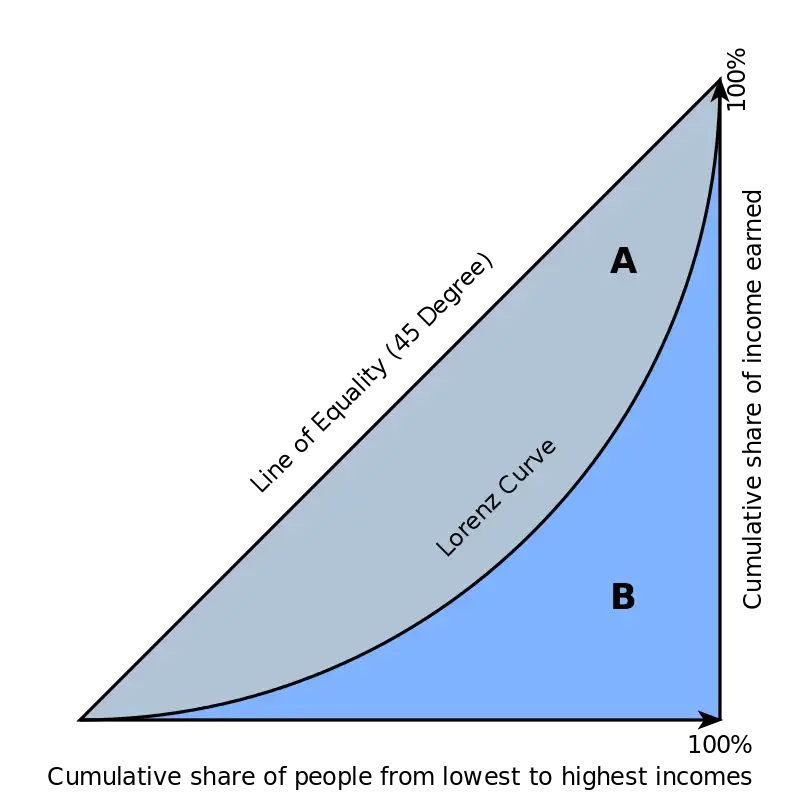
    <center/>
</div>

<div>
    <center>
    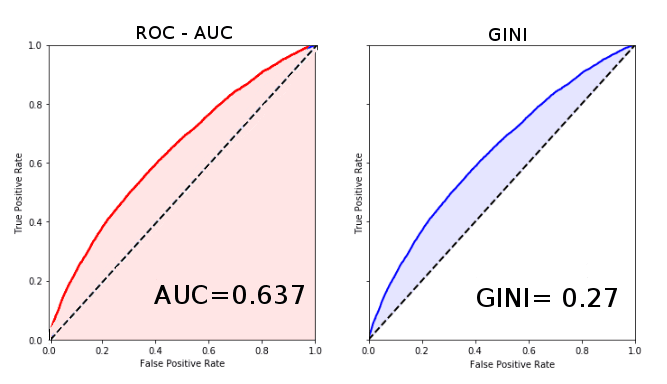
    </center>
</div>

Normalized Gini coefficient 계산하는 예시 코드:
[https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703](https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703)

<div>
    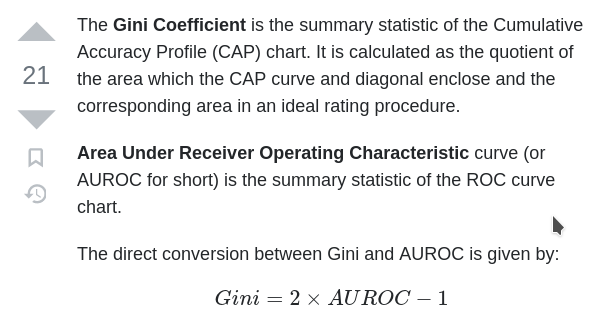
</div>


<div>
    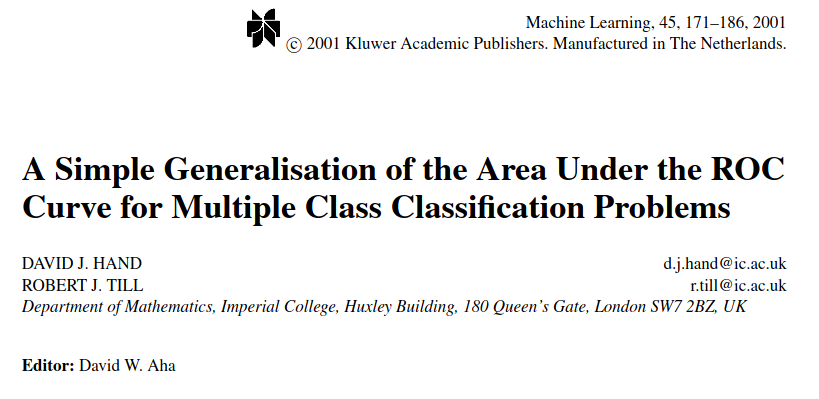
</div>

[https://link.springer.com/content/pdf/10.1023/A:1010920819831.pdf](https://link.springer.com/content/pdf/10.1023/A:1010920819831.pdf)

https://stats.stackexchange.com/questions/342329/gini-and-auc-relationship



In [1]:
MAX_ROUNDS = 400
OPTIMIZE_ROUNDS = False
LEARNING_RATE = 0.07
EARLY_STOPPING_ROUNDS = 50

Note: I set `EARLY_STOPPING_ROUNDS` high so that (when `OPTIMIZE_ROUNDS` is set) I will get lots of information to make my own judgment. You should probably reduce `EARLY_STOPPING_ROUNDS` if you want to do actual early stopping.

In [2]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from numba import jit
import time
import gc

C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
# Compute gini

# from CPMP's kernel https://www.kaggle.com/cpmpml/extremely-fast-gini-computation

@jit
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)] # observations are sorted by prediction
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i # y_i == 0 or 1
        gini += y_i * delta
        delta += 1 - y_i # if y_{i-1} == 1, delta += 0. else if y_{i-1} == 0 , delta += 1.
    print(f"Gini = {gini}")
    print(f"n = {n}, ntrue = {ntrue}")
    gini = 1 - 2*gini / (ntrue * (n - ntrue))
    print(f"Finally calculated gini = {gini}")
    return gini

```
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)
 
def test_gini():
    def fequ(a,b):
         return abs( a -b) < 1e-6
    def T(a, p, g, n):
        assert( fequ(gini(a,p), g) )
        assert( fequ(gini_normalized(a,p), n) )
    T([1, 2, 3], [10, 20, 30], 0.111111, 1)
    T([1, 2, 3], [30, 20, 10], -0.111111, -1)
    T([1, 2, 3], [0, 0, 0], -0.111111, -1)
    T([3, 2, 1], [0, 0, 0], 0.111111, 1)
    T([1, 2, 4, 3], [0, 0, 0, 0], -0.1, -0.8)
    T([2, 1, 4, 3], [0, 0, 2, 1], 0.125, 1)
    T([0, 20, 40, 0, 10], [40, 40, 10, 5, 5], 0, 0)
    T([40, 0, 20, 0, 10], [1000000, 40, 40, 5, 5], 0.171428,
      0.6)
    T([40, 20, 10, 0, 0], [40, 20, 10, 0, 0], 0.285714, 1)
    T([1, 1, 0, 1], [0.86, 0.26, 0.52, 0.32], -0.041666,
      -0.333333)
```

Target encoding(또는 mean encoding) of categorical target에 대한 설명:

[https://towardsdatascience.com/dealing-with-categorical-variables-by-using-target-encoder-a0f1733a4c69](https://towardsdatascience.com/dealing-with-categorical-variables-by-using-target-encoder-a0f1733a4c69)

[https://medium.com/@evanholder_40386/target-encoding-and-smoothing-for-ternary-targets-476db9f40ceb](https://medium.com/@evanholder_40386/target-encoding-and-smoothing-for-ternary-targets-476db9f40ceb)


In [4]:
# Functions from olivier's kernel
# https://www.kaggle.com/ogrellier/xgb-classifier-upsampling-1b-0-283
def gini_xgb(preds, dtrain): #gets prediction and training dataset
    labels = dtrain.get_label() #get the label from training dataset
    gini_score = -eval_gini(labels, preds) #gets the gini score
    return [('gini', gini_score)]

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                 val_series=None,
                 tst_series=None,
                 target=None,
                 min_samples_leaf=1,
                 smoothing=1,
                 noise_level=0):
    """
    Smoothing is computed like in the paper by Daniele Micci-Barreca https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior
    """
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}), # rest --> reset
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_val_series = pd.merge(
        val_series.to_frame(val_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=val_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_val_series.index = val_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_val_series, noise_level), add_noise(ft_tst_series, noise_level)

<Modeling>
KFold cross validation on XGBClassifier.

In [5]:
# Read data
train_df = pd.read_csv('./porto-segura-safe-driverprediction/train.csv', na_values="-1")
test_df = pd.read_csv('./porto-segura-safe-driverprediction/test.csv', na_values="-1")

In [6]:
train_df.iloc[0:200, :]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,493,0,1,1.0,7,0.0,0.0,0,0,0,...,3,2,4,8,0,1,0,0,0,0
196,495,0,3,2.0,4,0.0,0.0,0,0,0,...,6,0,3,7,0,1,1,0,1,0
197,496,0,2,1.0,6,0.0,3.0,1,0,0,...,5,1,4,13,0,1,0,0,1,0
198,498,0,3,1.0,3,1.0,0.0,0,1,0,...,9,1,1,4,1,1,1,0,0,0


In [7]:
# from olivier
train_features = [
    "ps_car_13",  #            : 1571.65 / shadow  609.23
	"ps_reg_03",  #            : 1408.42 / shadow  511.15
	"ps_ind_05_cat",  #        : 1387.87 / shadow   84.72
	"ps_ind_03",  #            : 1219.47 / shadow  230.55
	"ps_ind_15",  #            :  922.18 / shadow  242.00
	"ps_reg_02",  #            :  920.65 / shadow  267.50
	"ps_car_14",  #            :  798.48 / shadow  549.58
	"ps_car_12",  #            :  731.93 / shadow  293.62
	"ps_car_01_cat",  #        :  698.07 / shadow  178.72
	"ps_car_07_cat",  #        :  694.53 / shadow   36.35
	"ps_ind_17_bin",  #        :  620.77 / shadow   23.15
	"ps_car_03_cat",  #        :  611.73 / shadow   50.67
	"ps_reg_01",  #            :  598.60 / shadow  178.57
	"ps_car_15",  #            :  593.35 / shadow  226.43
	"ps_ind_01",  #            :  547.32 / shadow  154.58
	"ps_ind_16_bin",  #        :  475.37 / shadow   34.17
	"ps_ind_07_bin",  #        :  435.28 / shadow   28.92
	"ps_car_06_cat",  #        :  398.02 / shadow  212.43
	"ps_car_04_cat",  #        :  376.87 / shadow   76.98
	"ps_ind_06_bin",  #        :  370.97 / shadow   36.13
	"ps_car_09_cat",  #        :  214.12 / shadow   81.38
	"ps_car_02_cat",  #        :  203.03 / shadow   26.67
	"ps_ind_02_cat",  #        :  189.47 / shadow   65.68
	"ps_car_11",  #            :  173.28 / shadow   76.45
	"ps_car_05_cat",  #        :  172.75 / shadow   62.92
	"ps_calc_09",  #           :  169.13 / shadow  129.72
	"ps_calc_05",  #           :  148.83 / shadow  120.68
	"ps_ind_08_bin",  #        :  140.73 / shadow   27.63
	"ps_car_08_cat",  #        :  120.87 / shadow   28.82
	"ps_ind_09_bin",  #        :  113.92 / shadow   27.05
	"ps_ind_04_cat",  #        :  107.27 / shadow   37.43
	"ps_ind_18_bin",  #        :   77.42 / shadow   25.97
	"ps_ind_12_bin",  #        :   39.67 / shadow   15.52
	"ps_ind_14",  #            :   37.37 / shadow   16.65
]
# add combinations
combs = [
    ('ps_reg_01', 'ps_car_02_cat'),  
    ('ps_reg_01', 'ps_car_04_cat'),
]

In [8]:
# Process data
id_test = test_df['id'].values
id_train = train_df['id'].values
y = train_df['target']

start = time.time()
for n_c, (f1, f2) in enumerate(combs):
    name1 = f1 + "_plus_" + f2
    print('Current feature %60s %4d in %5.1f'
         % (name1, n_c + 1, (time.time() -start) / 60), end='')
    print('\r' * 75, end='')
    train_df[name1] = train_df[f1].apply(lambda x: str(x)) + "_" + train_df[f2].apply(lambda x: str(x))
    test_df[name1] = train_df[f1].apply(lambda x: str(x)) + "_" + train_df[f2].apply(lambda x: str(x))
    # Label Encode
    lbl = LabelEncoder()
    lbl.fit(list(train_df[name1].values) + list(test_df[name1].values))
    train_df[name1] = lbl.transform(list(train_df[name1].values))
    test_df[name1] = lbl.transform(list(test_df[name1].values))
    
    train_features.append(name1)
    
X = train_df[train_features]
test_df = test_df[train_features]

f_cats = [f for f in X.columns if "_cat" in f]

Current feature                                 ps_reg_01_plus_ps_car_04_cat    2 in   0.1

In [9]:
y_valid_pred = 0*y
y_test_pred = 0

In [10]:
# Set up folds
K = 5
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
np.random.seed(0)

# Set up classifier
model = XGBClassifier(
    n_estimators = MAX_ROUNDS,
    max_depth = 4,
    objective = 'binary:logistic', # target is binary.
    eval_metric = 'error',
    learning_rate = LEARNING_RATE,
    subsample = .8, # Use 0.8 of the entire data set for data generation
    min_child_weight = 6,
    colsample_bytree = .8,
    scale_pos_weight = 1.6,
    gamma = 10,
    reg_alpha = 10,
    reg_lambada = 1.3
)

Let me explain these parameters:

n_estimators: The number of trees or rounds. Adding more trees will be at the risk of overfitting. The reason is in the way that the boosted tree model is constructed, sequentially where each new tree attempts to model and correct for the errors made by the sequence of previous trees. Quickly, the model reaches a point of diminishing returns.

max_depth: The maximum depth of a tree. It is also used to control overfitting as higher depth will allow model to learn relations very specific to a particular sample. Typically, it should be chosen from 3 to 10 and tuned using CV.

objective: The loss function to be minimized. binary:logistic is for binary classification, which will return predicted probability (NOT CLASS).

learning_rate: The convergence control parameter in gradient descent. It is intuitive that XGB will not reach its minimum if both n_estimaters and learning_rate are very small.

subsample: The fraction of observations to be randomly chosen for each tree. Lower values make the algorithm more conservative and prevents overfitting, but too small values might lead to underfitting. So, be careful to choose and the typical values are between 0.5 and 1.

min_child_weight: The minimum sum of weights all observations required in child. It is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. A smaller min_child_weight allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit.

colsample_bytree: The fraction of features to use. By default it is set to 1 meaning that we will use all features. But in order to avoid the number of highly correlated trees is getting too big, we would like to use a sample of all the features for training to avoid overfitting.

scale_pos_weight: The parameter that controls the balance of positive and negative weights, useful for unbalanced classes. This dataset is unbalanced as we have seen, so we should be careful to tune it. The typical value to consider: sum(negative instances) / sum(positive instances).

gamma: The minimum loss reduction required to make a split. A node is split only when the resulting split gives a positive reduction in the loss function. The larger gamma is, the more conservative (overfitting) the algorithm will be. The values can vary depending on the loss function and should be tuned.

reg_alpha: L1 regularization term on weights. Increasing this value will make model more conservative.

reg_lambda: L2 regularization term on weights. Increasing this value will make model more conservative. Normalised to number of training examples.

[https://zg104.github.io/Safe_Driver_Prediction/](https://zg104.github.io/Safe_Driver_Prediction/)

In [11]:
for i, (train_index, test_index) in enumerate(kf.split(train_df)):
    
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index, :].copy(), X.iloc[test_index, :].copy()
    X_test = test_df.copy()
    print("\nFold", i)
    
    # Encode data
    for f in f_cats:
        X_train[f + "_avg"], X_valid[f + "_avg"], X_test[f + "_avg"] = target_encode(
            trn_series=X_train[f],
            val_series=X_valid[f],
            tst_series=X_test[f],
            target=y_train,
            min_samples_leaf=200,
            smoothing=10,
            noise_level=0
        )

    # Run model for this fold
    if OPTIMIZE_ROUNDS:
        eval_set = [(X_valid, y_valid)]
        fit_model = model.fit( X_train, y_train,
                             eval_set = eval_set,
                             eval_metric = gini_xgb,
                             early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                             verbose=False)
        print("  Best N trees = ", model.best_ntree_limit )
        print("  Best gini = ", model.best_score )
    else:
        fit_model = model.fit( X_train, y_train )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict_proba(X_valid)[:, 1]
    print( "  Gini = ", eval_gini(y_valid, pred) )
    y_valid_pred.iloc[test_index] = pred
    
    # Accumulate test set predictions
    y_test_pred += fit_model.predict_proba(X_test)[:, 1]
    
    del X_test, X_train, X_valid, y_train
    
    
y_test_pred /= K # Average test set predictions

print( "\nGini for full training set:" )
eval_gini(y, y_valid_pred)
    


Fold 0


C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:48:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "reg_lambada" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38448\1812399935.py:5: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "eval_gini" failed type inference due to: non-precise type pyobject
During: typing of argument at C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38448\1812399935.py (7)

File "C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38448\1812399935.py", line 7:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    ^

  @jit
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38448\1812399935.py:5: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "eval_gini" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38448\1812399935.py", line 13:
def eval_gini(y_true, y_prob):
    <source elided>
    n = len(y_true)
    for i 

Gini = 177378056
n = 119043, ntrue = 4334
Finally calculated gini = 0.2864186583201811
  Gini =  0.2864186583201811

Fold 1


C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:49:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "reg_lambada" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Gini = 177016051
n = 119043, ntrue = 4297
Finally calculated gini = 0.2819747203302766
  Gini =  0.2819747203302766

Fold 2


C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:49:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "reg_lambada" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Gini = 184077139
n = 119042, ntrue = 4436
Finally calculated gini = 0.27584595827092684
  Gini =  0.27584595827092684

Fold 3


C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:50:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "reg_lambada" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Gini = 171427880
n = 119042, ntrue = 4267
Finally calculated gini = 0.29992993801824486
  Gini =  0.29992993801824486

Fold 4


C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\seunghooh\Miniconda3\envs\ThinkBayes2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:51:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "reg_lambada" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Gini = 178548348
n = 119042, ntrue = 4360
Finally calculated gini = 0.28582591926714307
  Gini =  0.28582591926714307

Gini for full training set:


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38448\1812399935.py:5: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "eval_gini" failed type inference due to: non-precise type pyobject
During: typing of argument at C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38448\1812399935.py (7)

File "C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38448\1812399935.py", line 7:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    ^

  @jit
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38448\1812399935.py:5: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "eval_gini" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38448\1812399935.py", line 13:
def eval_gini(y_true, y_prob):
    <source elided>
    n = len(y_true)
    for i 

Gini = 4442990962
n = 595212, ntrue = 21694
Finally calculated gini = 0.285801823932625


0.285801823932625

In [12]:
# Save validation predictions for stacking/ensembling
val = pd.DataFrame()
val['id'] = id_train
val['target'] = y_valid_pred.values
val.to_csv('xgb_valid.csv', float_format='%.6f', index=False)

In [13]:
# Create submission file
sub = pd.DataFrame()
sub['id'] = id_test
sub['target'] = y_test_pred
sub.to_csv('xgb_submit.csv', float_format='%.6f', index=False)